In [1]:
# histogram clahe

import cv2
import numpy as np
import matplotlib.pylab as plt

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread('../img/bright.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
# cvtColor(src, code[, dst[, dstCn]])

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload
    .   
    .   this variant supports only uniform histograms.
    .   
    .   ranges argument is either empty vector or a flattened vector of histSize.size()*2 elements
    .   (histSize.size() element pairs). The first and second elements of each pair specify the lower and
    .   upper boundaries.



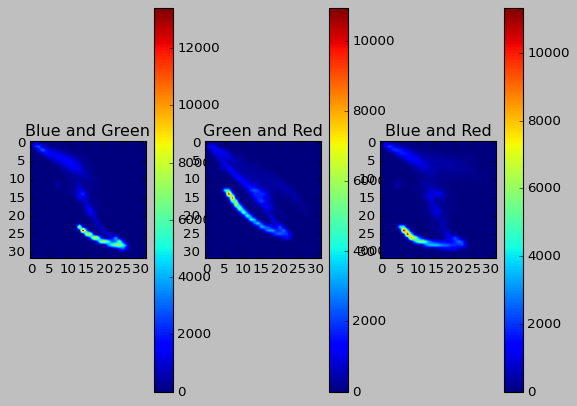

In [3]:
import cv2
import matplotlib.pylab as plt

plt.style.use('classic')            # --①컬러 스타일을 1.x 스타일로 사용
img = cv2.imread('../img/mountain.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0,1], None, [32,32], [0,256,0,256]) #--②
# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
p = plt.imshow(hist)                                            #--③
plt.title('Blue and Green')                                     #--④
plt.colorbar(p)                                                 #--⑤


plt.subplot(132)
hist = cv2.calcHist([img], [1,2], None, [32,32], [0,256,0,256]) #--⑥
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0,2], None, [32,32], [0,256,0,256]) #--⑦
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

In [4]:
import cv2
import numpy as np

# 영상의 15%를 알파 블렌딩의 범위로 지정
alpha_width_rate = 17

# 합성할 두 영상 읽기
# img_face = cv2.imread(r'C:\ex\cvdir\insightbook.opencv_project_python-master\img\cat_front2.jpg')
img_face = cv2.imread(r'C:\ex\cvdir\insightbook.opencv_project_python-master\img\dog_front2.jpg')
img_skull = cv2.imread(r'C:\ex\cvdir\insightbook.opencv_project_python-master\img\cat_front2.jpg')
img_face=cv2.resize(img_face,(500,500))
img_skull=cv2.resize(img_skull,(500,500))

# 고양이 사진을 scale_factor만큼 확대
scale_factor=1.1
original_height, original_width = img_skull.shape[:2]
new_width = int(original_width * scale_factor)
new_height = int(original_height * scale_factor)
img_skull = cv2.resize(img_skull, (new_width, new_height))

# 커진 고양이 사진을 강아지 사진으로 크롭하기
# 사진1의 크기 확인
photo1_height, photo1_width = img_face.shape[:2]
# 사진2의 크기 확인
photo2_height, photo2_width = img_skull.shape[:2]
# 사진2의 중앙 부분을 사진1의 크기에 맞게 크롭하기
start_x = (photo2_width - photo1_width) // 2
start_y = (photo2_height - photo1_height) // 2
img_skull = img_skull[start_y:start_y + photo1_height, start_x:start_x + photo1_width]

# 입력 영상과 같은 크기의 결과 영상 준비
img_comp = np.zeros_like(img_face)

# 연산에 필요한 좌표 계산
height, width = img_face.shape[:2]
middle = width//2                             # 영상의 중앙 좌표
alpha_width = width * alpha_width_rate // 100 # 알파 블렌딩 범위
start = middle - alpha_width//2               # 알파 블렌딩 시작 지점
step = 100/alpha_width                        # 알파 값 간격

# 입력 영상의 절반씩 복사해서 결과 영상에 합성
img_comp[:, :middle, : ] = img_face[:, :middle, :].copy()
img_comp[:, middle:, :] = img_skull[:, middle:, :].copy()
cv2.imshow('half', img_comp)

# 알파 값을 바꾸면서 알파 블렌딩 적용
for i in range(alpha_width+1 ):
    alpha = (100 - step * i) / 100  # 증감 간격에 따른 알파 값 (1~0)
    beta = 1 - alpha                # 베타 값 (0~1)
    # 알파 블렌딩 적용
    img_comp[:, start+i] = img_face[:, start+i] * \
                                alpha + img_skull[:, start+i] * beta
    print(i, alpha, beta)

# output_path = 'dog_cat.jpg'  # 저장할 파일 경로와 이름
# cv2.imwrite(output_path, dog_cat)

cv2.imshow('dog_cat', img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9882352941176471 0.0117647058823529
2 0.9764705882352941 0.02352941176470591
3 0.9647058823529412 0.03529411764705881
4 0.9529411764705883 0.04705882352941171
5 0.9411764705882354 0.05882352941176461
6 0.9294117647058823 0.07058823529411773
7 0.9176470588235294 0.08235294117647063
8 0.9058823529411765 0.09411764705882353
9 0.8941176470588235 0.10588235294117654
10 0.8823529411764706 0.11764705882352944
11 0.8705882352941177 0.12941176470588234
12 0.8588235294117647 0.14117647058823535
13 0.8470588235294118 0.15294117647058825
14 0.8352941176470589 0.16470588235294115
15 0.8235294117647058 0.17647058823529416
16 0.8117647058823529 0.18823529411764706
17 0.8 0.19999999999999996
18 0.7882352941176471 0.21176470588235285
19 0.776470588235294 0.22352941176470598
20 0.7647058823529411 0.23529411764705888
21 0.7529411764705882 0.24705882352941178
22 0.7411764705882353 0.2588235294117647
23 0.7294117647058823 0.2705882352941177
24 0.7176470588235294 0.2823529411764706
25 0.705882

In [11]:
# 이미지를 절대 경로에 저장하기
output_path = 'C:\ex\cvdir\insightbook.opencv_project_python-master\img\dog_cat.jpg'  # 저장할 파일 경로와 이름
cv2.imwrite(output_path, img_comp)

True